<a href="https://colab.research.google.com/github/TetricusCM/Data-analytiikkaa-Pythonilla/blob/main/Teht%C3%A4v%C3%A41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tehtävä 1

Tehtävässä 1 on tarkoituksena soveltaa kuvailevan ja selittävän analytiikan menetelmiä valitsemiisi datoihin. Voit käyttää alempana mainittuja data-paketin datoja tai omaan työhön tai kiinnnostuksen kohteisiin liittyviä datoja. Käytä tehtävässä vähintään kahta eri dataa ja huolehdi että saat mukaan sekä kategorisia että määrällisiä muuttujia.

Käytä datojen esittelyyn datan valmisteluun liittyviä menetelmiä (tutustuminen, suodatukset) ja tee datoille tarpeen vaatimat muunnokset.

Täysiin pisteisiin pääset vain soveltamalla kaikkia esimerkkimuistioissa esitettyjä menetelmiä (frekvenssitaulukot, luokitellut jakaumat, tilastolliset tunnusluvut, ristiintaulukoinnit, tunnuslukujen vertailut ja korrelaatiot). Käytä havainnollistamiseen graafisia esityksiä.

**Esitä datoille hyviä kysymyksiä ja vastaa kysymyksiin taulukoiden ja grafiikoiden lisäksi myös sanallisesti!.**




##Tehtävän arviointiperusteita

*  Työssä on käytetty vähintään kahta aineistoa.
*  Aineistoon tutustuminen
*  Aineiston suodatukset
*  Frekvenssitaulu
*  Luokiteltu jakauma
*  Tunnusluvut
*  Ristiintaulukointi
*  Tunnuslukujen vertailu
*  Korrelaatiot
*  Grafiikka
*  Sanalliset selitykset



Aluksi käsiteltävän datan hakeminen drivestä, sekä tarvittavien kirjastojen hakeminen.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data/

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

Mounted at /gdrive
/gdrive/MyDrive/data


Itseäni kiinnostavat datat:

**titanic.xlsx**

Titanicin matkustajaluettelo, jonka muuttujien selitykset löydät avaamalla tiedoston Exceliin.

Tältä datalta voit kysyä esimerkiksi: Kuinka paljon laivalla oli miehiä ja naisia? Minkälainen oli matkustajien ikäjakauma? Kuinka iso osuus matkustajista selvisi hengissä? Miten matkustajat jakautuivat eri hyttiluokkiin? Oliko naisten ja miesten selviytymisprosenteissa eroa? Vaikuttiko hyttiluokka selviytymiseen? Poikkesiko selvinneiden ikäjakauma kuolleiden ikäjakaumasta?

**rahastoraportti.xlsx**

Lähde: Suomen Sijoitustutkimus. Sisältää tietoja sijoitusrahastoista rr_batch_data -välilehdellä. Muuttujien selitykset löydät avaamalla tiedoston Exceliin. Tätä dataa ei kannata valita, jos sijoittaminen on sinulle täysin tuntematon alue.

Kategorinen muuttuja RR2009_class kertoo, minkälaisiin kohteisiin rahasto sijoittaa. Määrällisistä muuttujista 120M_return, 60M_return, 36M_return, 12M_return, 6M_return, 3M_return, 1M_return, 12M_volatility on hyvä laskea luokiteltuja jakaumia ja tilastollisia tunnuslukuja. On mielenkiintoista vertailla eri kohteisiin sijoittavien rahastojen tuottoja (120M_return, 60M_return, 36M_return, 12M_return, 6M_return, 3M_return, 1M_return) ja riskiä (12M_volatility). Mahtavatkohan rahastojen perimät hallinnointi- ja säilytyspalkkiot (mgmt_plus_cust_fee_numeric) korreloida tuottojen kanssa?

## Titanic

Aloitetaan Titanic-datasta

In [4]:
titanic = pd.read_excel('titanic.xlsx') #datan lukeminen tiedostosta
titanic.head() #Katsotaan miltä  data näyttää

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Muuttujat:

Dataframen muuttujat excel-tiedostosta

survival: Survival (0 = no; 1 = yes) \
pclass: Passenger class (1 = first; 2 = second; 3 = third)\
name: Name\
sex: Sex\
age: Age\
sibsp: Number of siblings/spouses aboard\
parch: Number of parents/children aboard\
ticket: Ticket number\
fare: Passenger fare\
cabin: Cabin\
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\
boat: Lifeboat (if survived)\
body: Body number (if did not survive and body was recovered)\

In [5]:
titanic.shape # Minkä kokoinen dataframe on?

(1309, 14)

### matkustajaluokat
Selvitetään ensimmäisenä kuinka paljon missäkin luokassa oli matkustajia.

In [15]:
# yksinkertainen frekvenssitaulukko

titanic1 = pd.crosstab(titanic['pclass'], 'f') # luodaan pandas-kirjaston avulla yksinkertainen frekvenssitaulukko matkustajaluokista

#poistetaan col_0
titanic1.columns.name = ''

#korvataan luokkien numerot selvittävillä teksteillä
titanic1.index =['1. luokka', '2. luokka', '3. luokka']

#prosenttimäärät omaan sarakkeeseen
n = titanic1['f'].sum()
titanic1['%'] = 100*titanic1['f']/n

#yhteensä-rivi
titanic1.loc['yhteensä'] = titanic1.sum()

titanic1.style.format({'f': '{:.0f}', '%':'{:.2f}'}) # hieman siistimistä

,f,%
1. luokka,323,24.68
2. luokka,277,21.16
3. luokka,709,54.16
yhteensä,1309,100.00


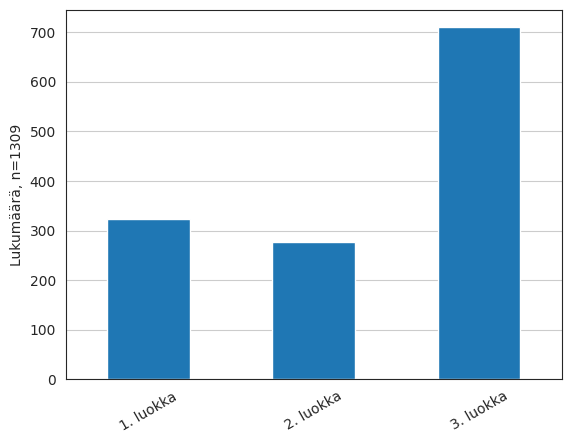

In [20]:
#muodostetaan palkkikaavio kuvaamaan yllä olevaa frekvenssitaulua ilman Yhteensä-riviä

#tiputetaan yhteensä pois:
titanic2=titanic1.drop('yhteensä')

#luodaan palkkikaavio
titanic2['f'].plot(kind='bar', rot = 30)

# lisätään y-akselille otsikko
plt.ylabel(f'Lukumäärä, n={n}')

#lisätään taustaviivoitus
plt.grid(axis='y')

### Matkustajamaksut

Tutkitaan maksettujen matkustajamaksujen jakaumaa

In [25]:
#pienimmän ja suurimman arvon selvittäminen
titanic['fare'].min()

0.0

In [26]:
titanic['fare'].max()

512.3292

In [44]:
titanic2 = titanic.copy()
#luodaan uusi luokiteltu muuttuja

rajat = [0, 20, 40, 60, 80, 100, 200, 300, 400, 500, 600] #datassa pieniä maksuja maksaneita on huomattavasti enemmän kuin suuria, joten hieman erikoisilla rajoilla saa paremman kuvan

#lisätään datan kopioon titanic2 uusi muuttuja luokittelemaan matkustajamaksuja

titanic2['fareclass'] = pd.cut(titanic2['fare'], bins=rajat, right=False)

titanic2.head()

#luodaan palkkaluokalle frekvenssitaulu

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fareclass
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[200, 300)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[100, 200)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[100, 200)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[100, 200)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[100, 200)"


In [45]:
#muodostetaan yksinkertainen frekvenssitaulu

titanic3 = pd.crosstab(titanic2['fareclass'], 'f')

#poistetaan col_0
titanic3.columns.name = ''


#lisätään prosenttisarake
n_fare = titanic3['f'].sum()
titanic3['%'] = 100*titanic3['f']/n

#yhteensä-rivi
titanic3.loc['yhteensä'] = titanic3.sum()



titanic3.style.format({'f': '{:.0f}', '%':'{:.1f}'})

,f,%
fareclass,,
"[0, 20)",752,57.4
"[20, 40)",292,22.3
"[40, 60)",78,6.0
"[60, 80)",69,5.3
"[80, 100)",33,2.5
"[100, 200)",46,3.5
"[200, 300)",34,2.6
"[500, 600)",4,0.3
yhteensä,1308,99.9


Text(0, 0.5, 'Lukumäärä, n = 1308')

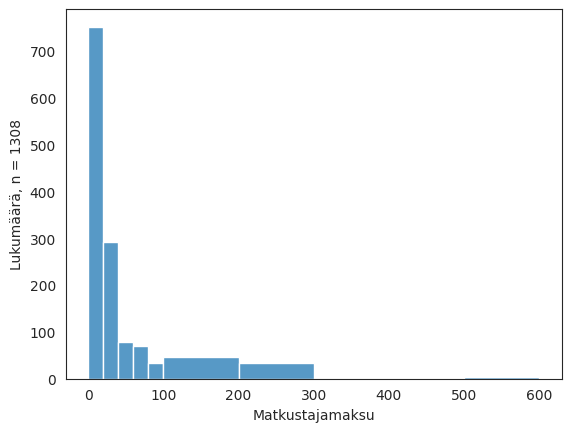

In [46]:
#titanic4 = pd.crosstab(titanic2['fare'], 'f')
#käytetään seaborn-kirjastoa ja aiemmin määriteltyjä luokkarajoja

sns.histplot(titanic2['fare'], bins=rajat)

#muokataan otsikoita

plt.xlabel('Matkustajamaksu')
plt.ylabel(f'Lukumäärä, n = {n_fare}')
